In [42]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dir_data="../home-credit-default-risk"
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
#the file encode problem on macOS
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../home-credit-default-risk/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
sub_df = app_train[app_train['DAYS_EMPLOYED'] != 365243]
sub_df.DAYS_EMPLOYED.replace(to_replace = 365243, value = np.nan, inplace = True)


In [46]:

correlationData = sub_df.corr()['TARGET']

In [47]:
correlationData = correlationData.sort_values(ascending = False)
largeCorrelation = correlationData[1:16]
smallCorrelation = correlationData[len(correlationData)-15:len(correlationData)]
print('top 15:\n', largeCorrelation)
print('last 15 :\n', smallCorrelation)

top 15:
 DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.067458
DAYS_BIRTH                     0.065756
REGION_RATING_CLIENT           0.065113
DAYS_LAST_PHONE_CHANGE         0.060288
REG_CITY_NOT_WORK_CITY         0.043384
REG_CITY_NOT_LIVE_CITY         0.041977
FLAG_DOCUMENT_3                0.041272
DAYS_ID_PUBLISH                0.039910
OWN_CAR_AGE                    0.039025
DAYS_REGISTRATION              0.036087
DEF_30_CNT_SOCIAL_CIRCLE       0.035868
DEF_60_CNT_SOCIAL_CIRCLE       0.034198
LIVE_CITY_NOT_WORK_CITY        0.024599
AMT_REQ_CREDIT_BUREAU_YEAR     0.024219
Name: TARGET, dtype: float64
last 15 :
 LIVINGAREA_AVG               -0.037417
ELEVATORS_MEDI               -0.037939
ELEVATORS_AVG                -0.038329
FLOORSMIN_MODE               -0.038403
FLOORSMIN_MEDI               -0.039266
FLOORSMIN_AVG                -0.039500
REGION_POPULATION_RELATIVE   -0.040640
AMT_CREDIT                   -0.040659
FLOORSMAX_MODE               -0.048554


Correlation: -0.0758


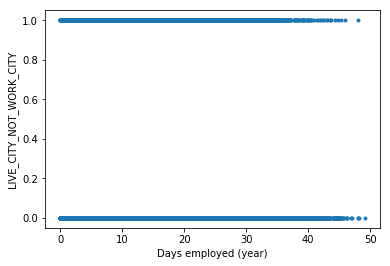

In [48]:
sub_df.DAYS_EMPLOYED = sub_df.DAYS_EMPLOYED/(-365)
sub_df.DAYS_EMPLOYED = sub_df.DAYS_EMPLOYED.fillna(0)

corr=np.corrcoef( sub_df.DAYS_EMPLOYED ,sub_df.LIVE_CITY_NOT_WORK_CITY )

print("Correlation: %.4f" % (corr[0][1]))

plt.plot(sub_df.DAYS_EMPLOYED,sub_df.LIVE_CITY_NOT_WORK_CITY, '.')
plt.xlabel('Days employed (year)')
plt.ylabel('LIVE_CITY_NOT_WORK_CITY')

plt.show()

Correlation: -0.0278


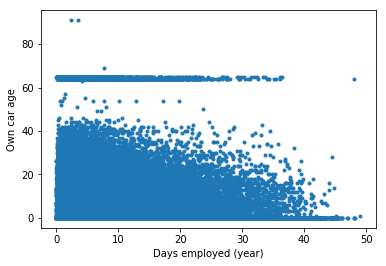

In [49]:
sub_df.OWN_CAR_AGE = sub_df.OWN_CAR_AGE.fillna(0)
sub_df.DAYS_EMPLOYED = sub_df.DAYS_EMPLOYED.fillna(0)

corr=np.corrcoef( sub_df.DAYS_EMPLOYED ,sub_df.OWN_CAR_AGE )

print("Correlation: %.4f" % (corr[0][1]))

plt.plot(sub_df.DAYS_EMPLOYED,sub_df.OWN_CAR_AGE, '.')
plt.xlabel('Days employed (year)')
plt.ylabel('Own car age')

plt.show()

Correlation: 0.0108


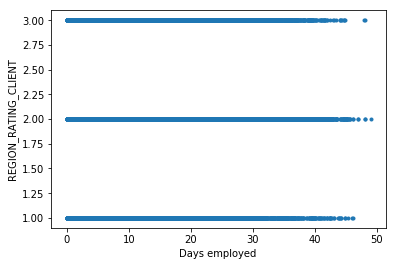

In [50]:

corr=np.corrcoef( sub_df.DAYS_EMPLOYED ,sub_df.REGION_RATING_CLIENT )

print("Correlation: %.4f" % (corr[0][1]))

plt.plot(sub_df.DAYS_EMPLOYED,sub_df.REGION_RATING_CLIENT, '.')
plt.xlabel('Days employed ')
plt.ylabel('REGION_RATING_CLIENT')

plt.show()

Correlation of EXT SOURCE 3 and TARGET:  0         0.139376
1              NaN
2         0.729567
3              NaN
4              NaN
5         0.621226
6         0.492060
7         0.540654
9              NaN
10        0.363945
12        0.176653
13        0.770087
14             NaN
15        0.678568
16        0.062103
17             NaN
18        0.556727
19        0.477649
20             NaN
21        0.542445
22        0.358951
24        0.565608
25        0.461482
26        0.190706
27        0.659406
28        0.524496
29             NaN
30        0.410103
31             NaN
32        0.798137
            ...   
307477    0.667458
307478    0.420611
307479    0.352340
307480    0.647977
307481    0.511892
307482    0.394495
307484         NaN
307485    0.865896
307486    0.199771
307488    0.529890
307489    0.397946
307490    0.495666
307491    0.716570
307492    0.365617
307493    0.728141
307494    0.511892
307495    0.597192
307496    0.486653
307497    0.524496
307498   

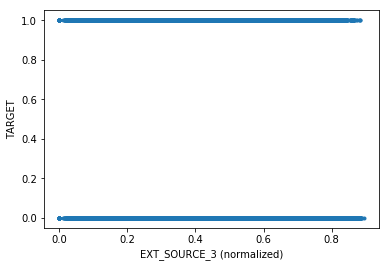

In [53]:
print('Correlation of EXT SOURCE 3 and TARGET: ', sub_df.EXT_SOURCE_3)

plt.plot(sub_df.EXT_SOURCE_3,sub_df.TARGET,'.')
plt.xlabel('EXT_SOURCE_3 (normalized)')
plt.ylabel('TARGET')
plt.show()